In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline
import os, random
from shutil import copytree
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [ ]:
for i in range(10):
    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
    copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample/patches1/' + patches1)
    copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample/patches0/' + patches0)
    

In [3]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [4]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [5]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [7]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
from skimage import color
def dir_label(dir):
    return(dir)


In [78]:
import glob2
image_list = []
image_labels = []
for filename in glob2.glob(data_path+'sample/*/*'):
    img = load_array(filename)
    print(dir_label(filename))
    image_list.append(color.gray2rgb(img))
    image_labels.append(0)
img_array = np.asarray(image_list)
img_array = np.transpose(img_array,(0,3,1,2))


SyntaxError: invalid syntax (<ipython-input-78-c30e8413bcef>, line 5)

In [64]:
img_array.shape

(20, 3, 224, 224)

In [65]:
img_array[0][1].shape

(224, 224)

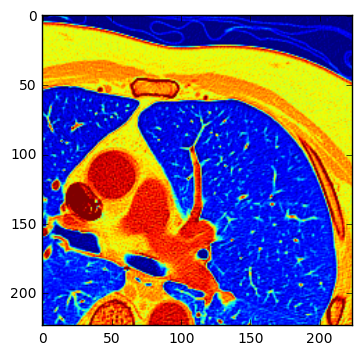

In [66]:
plt.imshow(img_array[13][0])

In [67]:
img_array.shape

(20, 3, 224, 224)

In [68]:
batch_size = 8